In [48]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os

(2304, 2304)


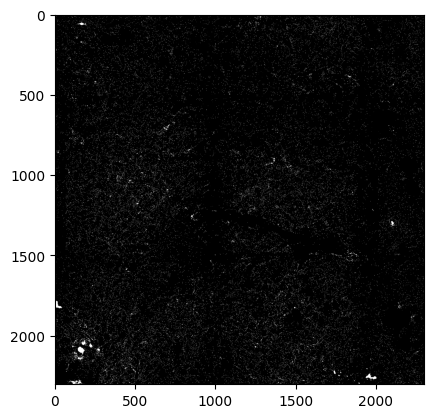

In [49]:
path = "/data/dkermany_data/Platelet_Project/VAK_21-39-2_48393_5_Obtained_12292021_pred_161.png"
filename = os.path.splitext(os.path.basename(path))[0]
dirname = os.path.dirname(os.path.normpath(path))

# Load binary mask image
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(image.shape)

plt.figure()
plt.imshow(image, cmap="gray")


In [50]:
# gets centroids in X, Y format
n_points, _, _, centroids = cv2.connectedComponentsWithStats(image)

# flips centroids to Y, X format and saves to dataframe
df = pd.DataFrame(centroids[:, ::-1], columns=["Y", "X"])
df

,Y,X
0,1147.183347,1155.209889
1,0.000000,77.500000
2,0.333333,87.333333
3,0.000000,99.000000
4,0.500000,132.500000
...,...,...
37331,2302.666667,2133.666667
37332,2302.666667,2151.666667
37333,2303.000000,2207.000000
37334,2302.666667,2249.833333


In [51]:
# Save to same folder as input image
output_path = os.path.join(dirname, f"{filename}.csv")
df.to_csv(output_path)